## 0. Columns' meaning

- Neo Reference ID - Near Earth Object (NEO) reference ID number for an asteroid (or a comet) which comes close to earth
- Name - 'Name' of asteroid (same as NEO Reference ID)
- Absolute Magnitude - A measure of the asteroid's luminosity (in H) (the brightness of an asteroid if it is 1 astronomical unit away from both the Sun and the observer, and the angle between the Sun, asteroid, and Earth is 0 degrees)
- Est Dia in (in KM, M, Miles, and Feet) (min) - Minimum estimated diameter of the asteroid (Note: Since asteroids cannot be directly measured and because they have irregular shapes, their diameters are estimates. These estimates are calculated using its absolute magnitude and geometric albedo.)
- Est Dia in (in KM, M, Miles, and Feet) (max) - Maximum estimated diameter of the asteroid
- Close Approach Date - Date at which the asteroid approaches close to Earth
- Epoch Date Close Approach - Date at which the asteroid approaches close to Earth (in epoch time)
- Relative Velocity (in km per sec, km per hr, and miles per hour) - Asteroid's velocity relative to earth
- Miss Dist.(in Astronomical, lunar, km, and miles) - Distance by which the asteroid misses Earth
- Orbiting Body
- Orbit ID - An ID of JPL NEA orbit that JPL Nasa uses in its analysis
- Orbit Determination Date - Date at which the asteroid's orbit was determined
- Orbit Uncertainity - A measure of the uncertainity ('measurement errors') in the calculated orbit
- Minimum Orbit Intersection - The closest distance between Earth and the asteroid in their respective orbits (in astronomical units)
- Jupiter Tisserand Invariant - A value used to differentiate between asteroids and Jupiter-family comets
- Epoch Osculation - The instance of time at which the asteroid's position and velocity vectors (from which its osculating orbit is calculated) is specified
- Eccentricity - A value which specifies by how much the asteroid's orbit deviates from a perfect circle
- Semi Major Axis - The longest radius of an elliptical orbit; a easure of the asteroid's average distance from the Sun (asteroids orbit the Sun)
- Inclination - Measures the tilt of the asteroid's orbit around the Sun
- Asc Node Longitude - (copying from NASA) 'Angle in the ecliptic plane between the inertial-frame x-axis and the line through the ascending node'
- Orbital Period - Time taken for asteroid to complete a single orbit around the Sun
- Perihelion Distance - Distance of point in asteroid's orbit which is closest to the Sun
- Perihelion Arg - (copying from Nasa) 'The angle (in the body's orbit plane) between the ascending node line and perihelion measured in the direction of the body's orbit'
- Aphelion Dist - Distance of point in asteroid's orbit which is farthest from the Sun
- Perihelion Time - Length of time of asteroid's passage through the perihelion stage
- Mean Anomaly - (copying from Nasa) 'The product of an orbiting body's mean motion and time past perihelion passage'
- Mean Motion - (copying from Nasa) 'The angular speed required for a body to make one orbit around an ideal ellipse with a specific semi-major axis'
- Equinox - An astronomical standard to measure against (currently 'J2000.0')
- Hazardous - Is the asteroid hazardous? (True or False)

## 1. Import libraries

In [1]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split 
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.preprocessing import scale, StandardScaler
import imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.datasets import make_classification
from collections import Counter
from imblearn.over_sampling import SMOTE


## 2. Loading the data

In [3]:
df_raw = pd.read_csv("nasa.csv")
df_raw

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.300,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.300,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.400,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,3759007,3759007,23.900,0.044112,0.098637,44.111820,98.637028,0.027410,0.061290,144.723824,...,164.183305,457.179984,0.741558,276.395697,1.581299,2.457708e+06,304.306025,0.787436,J2000,False
4683,3759295,3759295,28.200,0.006089,0.013616,6.089126,13.615700,0.003784,0.008460,19.977449,...,345.225230,407.185767,0.996434,42.111064,1.153835,2.458088e+06,282.978786,0.884117,J2000,False
4684,3759714,3759714,22.700,0.076658,0.171412,76.657557,171.411509,0.047633,0.106510,251.501180,...,37.026468,690.054279,0.965760,274.692712,2.090708,2.458300e+06,203.501147,0.521698,J2000,False
4685,3759720,3759720,21.800,0.116026,0.259442,116.025908,259.441818,0.072095,0.161210,380.662441,...,163.802910,662.048343,1.185467,180.346090,1.787733,2.458288e+06,203.524965,0.543767,J2000,False


### Backing up data

In [4]:
df = df_raw.copy()

## 3. Review the contents of the dataset

In [5]:
df.columns

Index(['Neo Reference ID', 'Name', 'Absolute Magnitude', 'Est Dia in KM(min)',
       'Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)',
       'Est Dia in Miles(min)', 'Est Dia in Miles(max)',
       'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Close Approach Date',
       'Epoch Date Close Approach', 'Relative Velocity km per sec',
       'Relative Velocity km per hr', 'Miles per hour',
       'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)',
       'Miss Dist.(kilometers)', 'Miss Dist.(miles)', 'Orbiting Body',
       'Orbit ID', 'Orbit Determination Date', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
       'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination',
       'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance',
       'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly',
       'Mean Motion', 'Equinox', 'Hazardous'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

In [7]:
df.describe()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
count,4.687000e+03,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,...,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000
mean,3.272298e+06,3.272298e+06,22.267865,0.204604,0.457509,204.604203,457.508906,0.127135,0.284283,671.273653,...,1.400264,13.373844,172.157275,635.582076,0.813383,183.932151,1.987144,2.457728e+06,181.167927,0.738242
std,5.486011e+05,5.486011e+05,2.890972,0.369573,0.826391,369.573402,826.391249,0.229642,0.513496,1212.511199,...,0.524154,10.936227,103.276777,370.954727,0.242059,103.513035,0.951519,9.442264e+02,107.501623,0.342627
min,2.000433e+06,2.000433e+06,11.160000,0.001011,0.002260,1.010543,2.259644,0.000628,0.001404,3.315431,...,0.615920,0.014513,0.001941,176.557161,0.080744,0.006918,0.803765,2.450100e+06,0.003191,0.086285
25%,3.097594e+06,3.097594e+06,20.100000,0.033462,0.074824,33.462237,74.823838,0.020792,0.046493,109.784247,...,1.000635,4.962341,83.081208,365.605031,0.630834,95.625916,1.266059,2.457815e+06,87.006918,0.453289
50%,3.514799e+06,3.514799e+06,21.900000,0.110804,0.247765,110.803882,247.765013,0.068850,0.153954,363.529809,...,1.240981,10.311836,172.625393,504.947292,0.833153,189.761641,1.618195,2.457973e+06,185.718889,0.712946
75%,3.690060e+06,3.690060e+06,24.500000,0.253837,0.567597,253.837029,567.596853,0.157727,0.352688,832.798679,...,1.678364,19.511681,255.026909,794.195972,0.997227,271.777557,2.451171,2.458108e+06,276.531946,0.984669
max,3.781897e+06,3.781897e+06,32.100000,15.579552,34.836938,15579.552413,34836.938254,9.680682,21.646663,51114.018738,...,5.072008,75.406667,359.905890,4172.231343,1.299832,359.993098,8.983852,2.458839e+06,359.917991,2.039000


### 'Hazardous' breakdown

In [8]:
df["Hazardous"].value_counts()

False    3932
True      755
Name: Hazardous, dtype: int64

In [9]:
hazard = df[["Hazardous"]].apply(lambda x:x.value_counts())
hazard["Frequency [%]"] = round((100*hazard/ hazard.sum()),2)
print(hazard)

       Hazardous  Frequency [%]
False       3932          83.89
True         755          16.11


Text(0.5, 1.0, 'Hazard Breakdown')

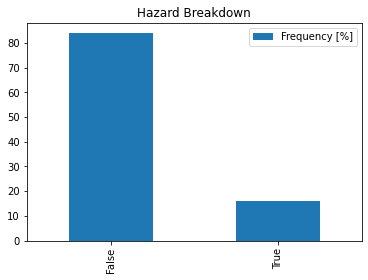

In [10]:
plot = hazard[["Frequency [%]"]].plot(kind="bar")
plot.set_title("Hazard Breakdown")

### Checking null values

In [11]:
#null values
missing_data = df.isnull().sum()
missing_data

Neo Reference ID                0
Name                            0
Absolute Magnitude              0
Est Dia in KM(min)              0
Est Dia in KM(max)              0
Est Dia in M(min)               0
Est Dia in M(max)               0
Est Dia in Miles(min)           0
Est Dia in Miles(max)           0
Est Dia in Feet(min)            0
Est Dia in Feet(max)            0
Close Approach Date             0
Epoch Date Close Approach       0
Relative Velocity km per sec    0
Relative Velocity km per hr     0
Miles per hour                  0
Miss Dist.(Astronomical)        0
Miss Dist.(lunar)               0
Miss Dist.(kilometers)          0
Miss Dist.(miles)               0
Orbiting Body                   0
Orbit ID                        0
Orbit Determination Date        0
Orbit Uncertainity              0
Minimum Orbit Intersection      0
Jupiter Tisserand Invariant     0
Epoch Osculation                0
Eccentricity                    0
Semi Major Axis                 0
Inclination   

### Histograms

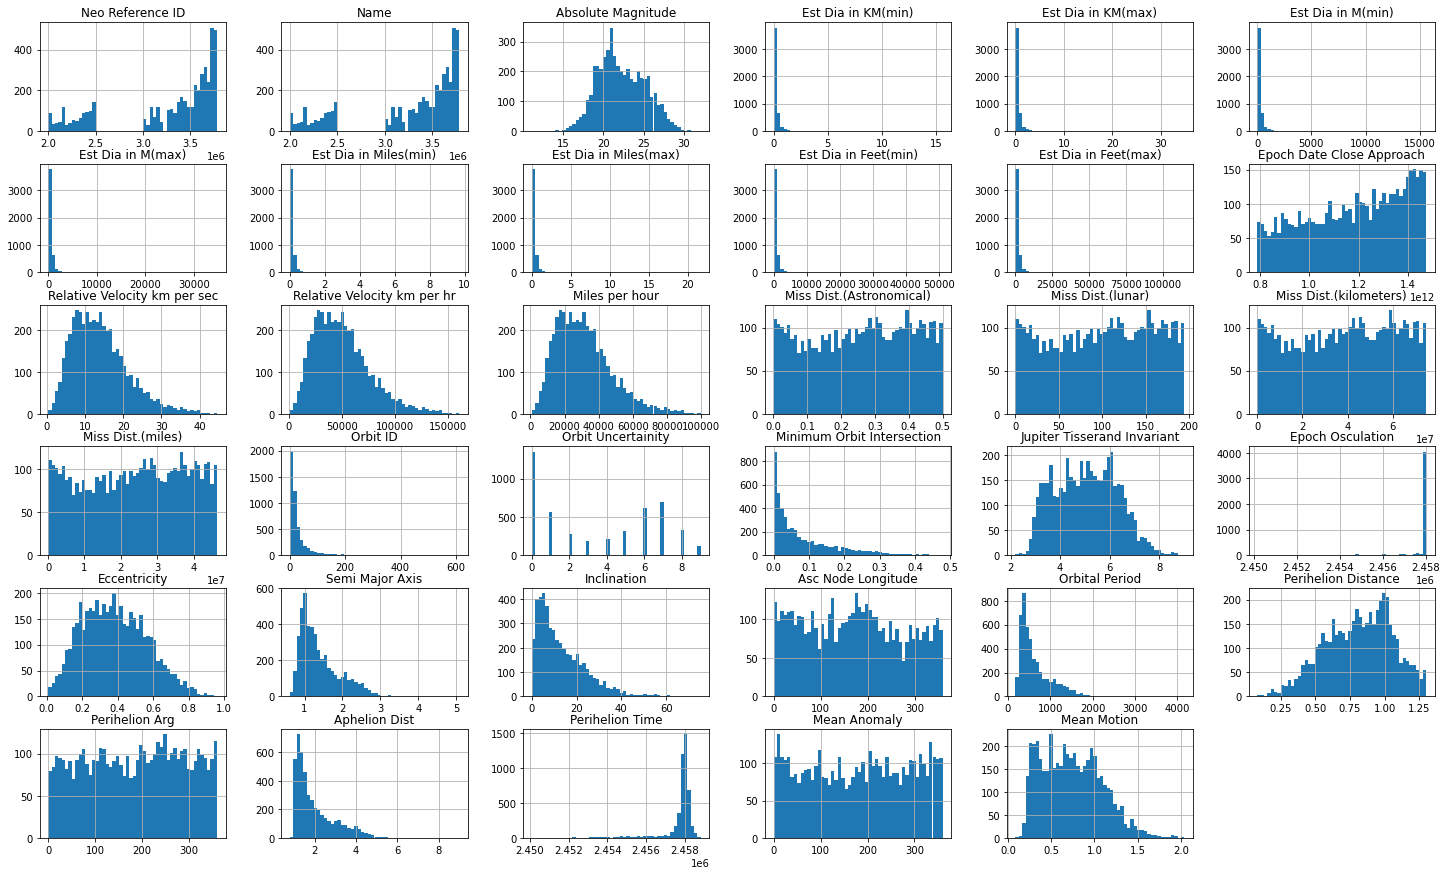

In [12]:
df.hist(bins=50, figsize=(25,15))
plt.show()

/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


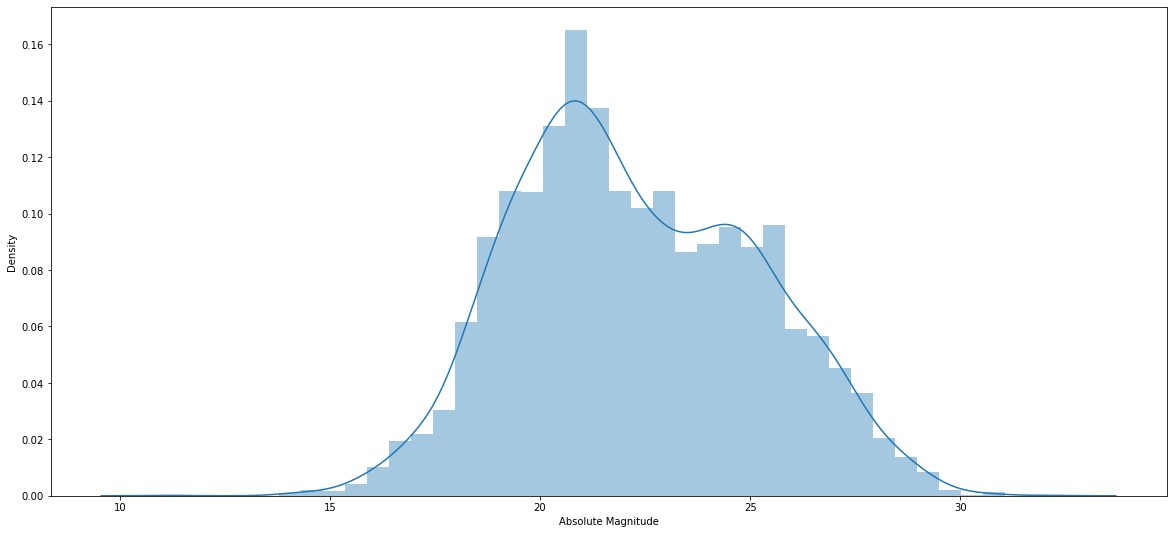

In [13]:
plt.rcParams['figure.figsize'] = (20, 9)
sns.distplot(df['Absolute Magnitude'])
# sns.histplot(df['Absolute Magnitude'])
# sns.displot(df['Absolute Magnitude'])
plt.show()

### Correlation matrix

<AxesSubplot:>

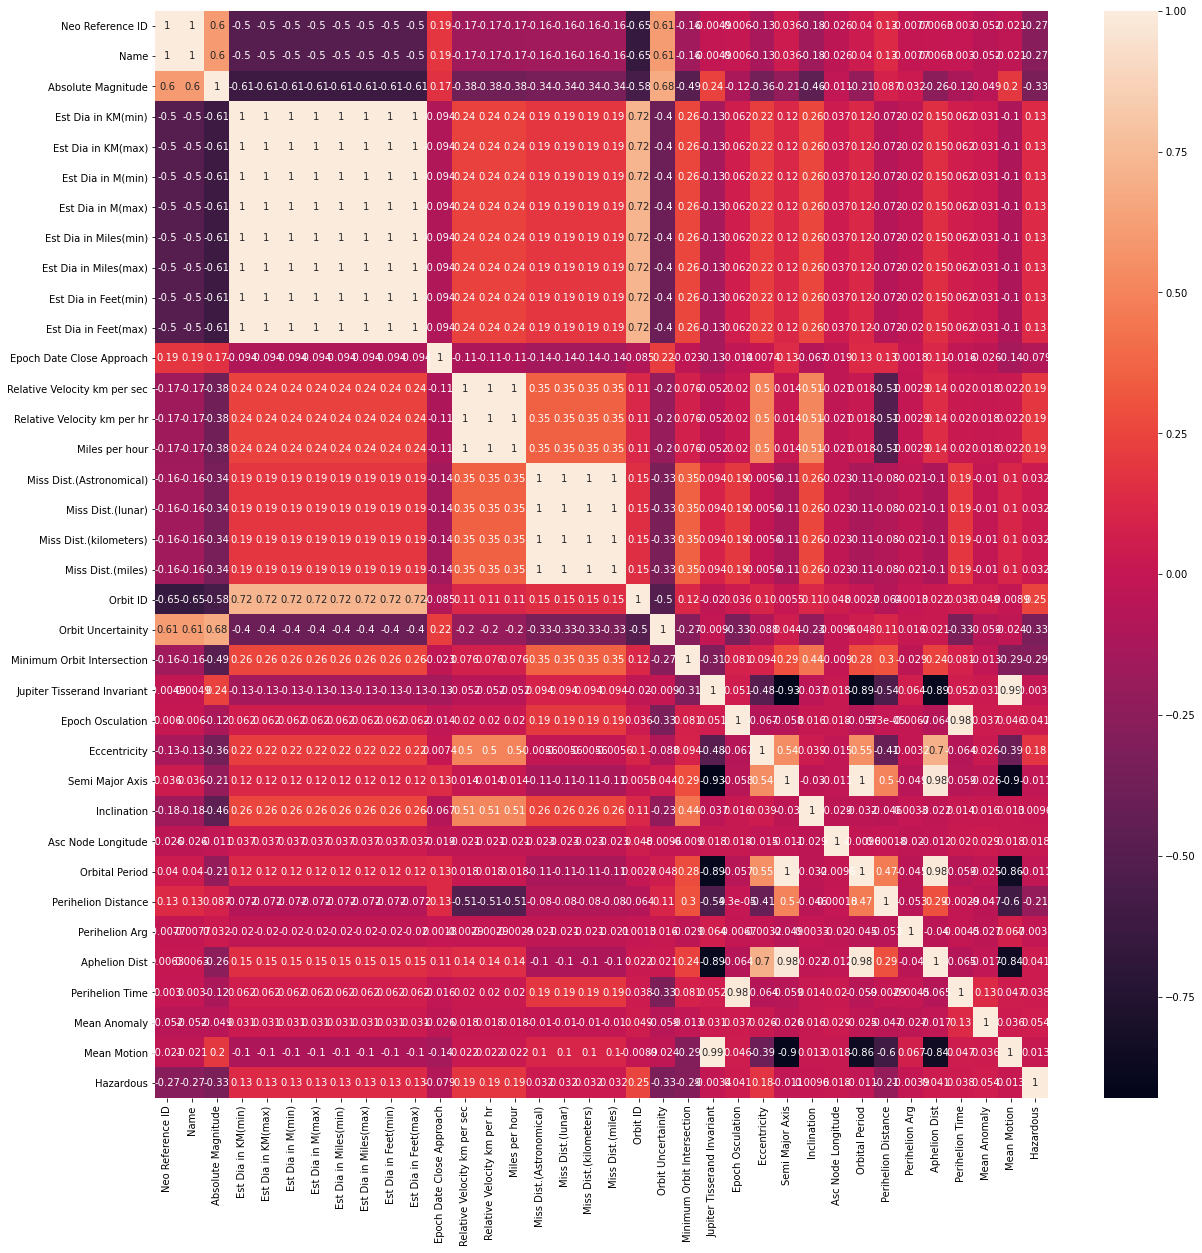

In [14]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

In [15]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title('Correlation Matrix', fontsize=15)
    plt.show()

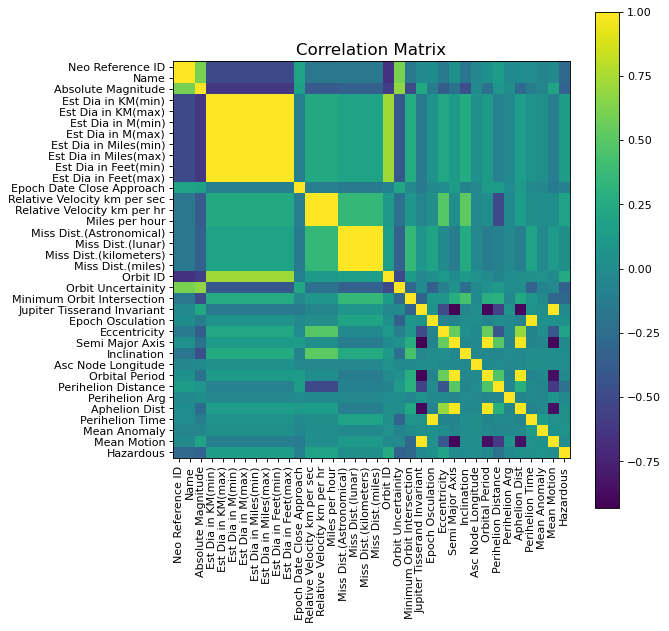

In [16]:
plotCorrelationMatrix(df, 8)

### Checking the columns with datatype 'object'

In [17]:
close = df[['Close Approach Date']]

In [18]:
print(f"Zakres dat dla kolumny 'Close Approach Date' to {close.min()} i {close.max()}")

Zakres dat dla kolumny 'Close Approach Date' to Close Approach Date    1995-01-01
dtype: object i Close Approach Date    2016-09-08
dtype: object


In [19]:
df[['Orbiting Body']]

,Orbiting Body
0,Earth
1,Earth
2,Earth
3,Earth
4,Earth
...,...
4682,Earth
4683,Earth
4684,Earth
4685,Earth


In [20]:
df['Orbiting Body'].unique()  #jedna wartosc - ta kolumna nic nie wnosi

array(['Earth'], dtype=object)

In [21]:
orbit = df[['Orbit Determination Date']]

In [22]:
print(f"Zakres dat dla kolumny 'Orbit Determination Date' to {orbit.min()} i {orbit.max()}")

Zakres dat dla kolumny 'Orbit Determination Date' to Orbit Determination Date    2014-06-13 15:20:44
dtype: object i Orbit Determination Date    2017-09-28 06:49:30
dtype: object


In [23]:
df[['Equinox']]

,Equinox
0,J2000
1,J2000
2,J2000
3,J2000
4,J2000
...,...
4682,J2000
4683,J2000
4684,J2000
4685,J2000


In [24]:
df.Equinox.unique() #jedna wartosc - ta kolumna nic nie wnosi

array(['J2000'], dtype=object)

In [25]:
df[['Epoch Date Close Approach']]

,Epoch Date Close Approach
0,788947200000
1,788947200000
2,789552000000
3,790156800000
4,790156800000
...,...
4682,1473318000000
4683,1473318000000
4684,1473318000000
4685,1473318000000


## 4. Encoding

In [26]:
def encoding(data, column_name, function_name):
    ''' data = df
        column_name = populate only 1 column name!
        function_name - choose one of the below:
            LabelEncoder
            OneHotEncoder
            get_dummies
            OrdinalEncoder
    '''
    if function_name == LabelEncoder:
        column = data[column_name]
        encoder = function_name()
        encoder.fit(column)
        data[column_name] = encoder.fit_transform(column)
    elif function_name == OneHotEncoder:
        column = np.array(data[column_name]).reshape(-1,1)
        encoder = function_name(drop = 'first', sparse=False)
        encoder.fit(column)
        new = encoder.transform(column)
        categories = encoder.categories_
        for i in range(len(categories[0]) - 1):
            data[column_name + "_" + categories[0][i]] = pd.Series(new[:,i])
        data.drop(columns=column_name, inplace=True)
    elif function_name == get_dummies:
        pd.get_dummies(data, drop_first=True, columns = [column_name])
    elif function_name == OrdinalEncoder:
        column = np.array(data[column_name]).reshape(-1,1)
        encoder = function_name()
        encoder.fit(column)
        new = encoder.transform(column)
        data[column_name] = pd.Series(new[:,0])

    else:
        print('Some data must have been populated incorrectly, please check again')

In [27]:
def standardization(data, column_name, function_name):
    """ data = df
        column_name = populate only 1 column name!
        function_name - choose one of the below:
            standardize: return (column_name - column_name.mean()) / column_name.std()
            StandardScaler
            scale
    """
    if function_name == standardize:
        column = data[column_name]
        data[column_name] = (column - column.mean()) / column.std()
    elif function_name == StandardScaler:
        column = data[[column_name]]
        scaler = StandardScaler()
        data[column_name] = scaler.fit_transform(column)
    elif function_name == scale:
        column = data[column_name]
        data[column_name] = scale(column)
    else:
        print('Some data must have been populated incorrectly, please check again')


In [28]:
def drop_data(columns):
    """ as a 'columns', provide a list of columns' names
    """
    df.drop(columns, axis='columns', inplace=True)

In [29]:
drop_data(['Orbiting Body', 'Equinox', 'Est Dia in M(min)', 'Est Dia in M(max)', 
           'Est Dia in Miles(min)','Est Dia in Miles(max)', 'Est Dia in Feet(min)', 'Est Dia in Feet(max)',
           'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)', 'Miss Dist.(miles)'])

#'Hazardous' will have to be removed as well

## 5. Imbalanced dataset

### a) Random Under-Sampling

Undersampling can be defined as removing some observations of the majority class. This is done until the majority and minority class is balanced out.

Undersampling can be a good choice when you have a ton of data -think millions of rows. But a drawback to undersampling is that we are removing information that may be valuable.

https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/

class 0: (3932, 29)
class 1: (755, 29)
total class of 1 and 0: False    755
True     755
Name: Hazardous, dtype: int64


<AxesSubplot:title={'center':'count (target)'}>

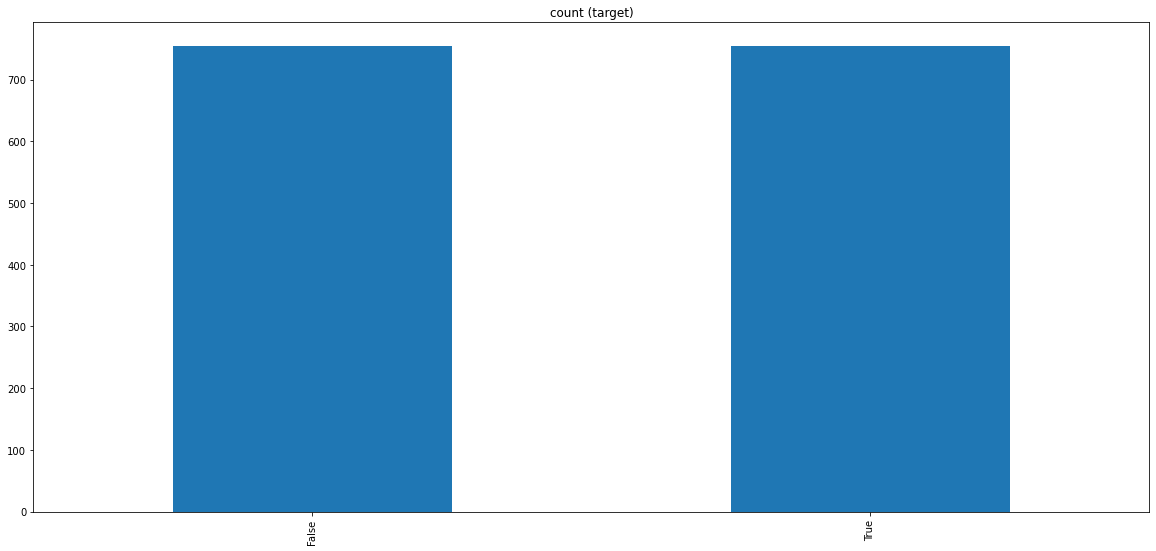

In [30]:
class_count_0, class_count_1 = df['Hazardous'].value_counts()
class_0 = df[df['Hazardous'] == 0]
class_1 = df[df['Hazardous'] == 1]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class_0_under = class_0.sample(class_count_1)
test_under = pd.concat([class_0_under, class_1], axis=0)

print("total class of 1 and 0:",test_under['Hazardous'].value_counts())# plot the count after under-sampeling
test_under['Hazardous'].value_counts().plot(kind='bar', title='count (target)')

### b) Random Over-Sampling

Oversampling can be defined as adding more copies to the minority class. Oversampling can be a good choice when you don’t have a ton of data to work with.

A con to consider when undersampling is that it can cause overfitting and poor generalization to your test set.

total class of 1 and 0: False    755
True     755
Name: Hazardous, dtype: int64


<AxesSubplot:title={'center':'count (target)'}>

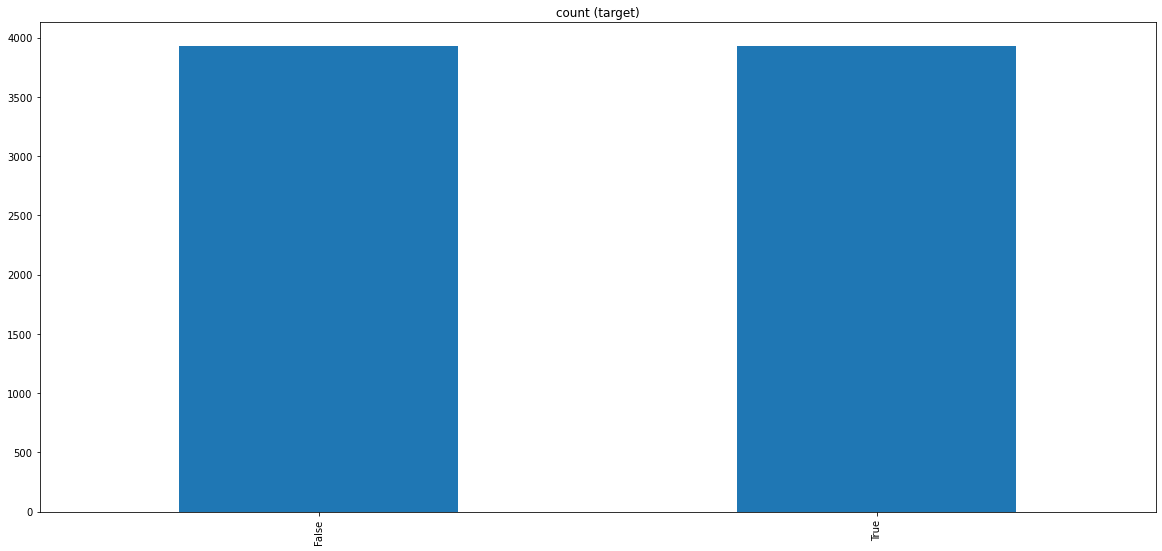

In [31]:
class_1_over = class_1.sample(class_count_0, replace=True)

test_over = pd.concat([class_1_over, class_0], axis=0)

print("total class of 1 and 0:",test_under['Hazardous'].value_counts())# plot the count after under-sampeling
test_over['Hazardous'].value_counts().plot(kind='bar', title='count (target)')

#### Define dataset

In [32]:
x = df[['Absolute Magnitude', 'Est Dia in KM(min)', 'Est Dia in KM(max)', 'Relative Velocity km per hr',
        'Miss Dist.(kilometers)', 'Orbit Uncertainity', 'Minimum Orbit Intersection', 
        'Jupiter Tisserand Invariant', 'Epoch Osculation','Eccentricity','Semi Major Axis', 
        'Inclination','Asc Node Longitude', 'Orbital Period','Perihelion Distance','Perihelion Arg',
        'Aphelion Dist','Perihelion Time','Mean Anomaly','Mean Motion']]
y = df['Hazardous']

# y = df['Hazardous'].astype(int)
# y.head()

In [33]:
# x, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
#                            n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

### c) Random under-sampling with imblearn

#### Python Counter 
takes in input a list, tuple, dictionary, string, which are all iterable objects, and it will give you output that will have the count of each element.

In [34]:
rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
x_rus, y_rus = rus.fit_resample(x, y)

print('original dataset shape:', Counter(y))
print('Resample dataset shape', Counter(y_rus))

original dataset shape: Counter({False: 3932, True: 755})
Resample dataset shape Counter({False: 755, True: 755})


### d) Random over-sampling with imblearn

In [35]:
ros = RandomOverSampler(random_state=42)

# fit predictor and target variablex_ros, y_ros = ros.fit_resample(x, y)
x_ros, y_ros = ros.fit_resample(x, y)


print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({False: 3932, True: 755})
Resample dataset shape Counter({True: 3932, False: 3932})


## 6. XGBClassifier()

In [36]:
df[df.columns[31:40]]

""
0
1
2
3
4
...
4682
4683
4684
4685


In [37]:
X = df[['Absolute Magnitude', 'Est Dia in KM(min)', 'Est Dia in KM(max)', 'Relative Velocity km per hr',
        'Miss Dist.(kilometers)', 'Orbit Uncertainity', 'Minimum Orbit Intersection', 
        'Jupiter Tisserand Invariant', 'Epoch Osculation','Eccentricity','Semi Major Axis', 
        'Inclination','Asc Node Longitude', 'Orbital Period','Perihelion Distance','Perihelion Arg',
        'Aphelion Dist','Perihelion Time','Mean Anomaly','Mean Motion']]
X.head()

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Relative Velocity km per hr,Miss Dist.(kilometers),Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
0,21.6,0.127220,0.284472,22017.003799,62753692.0,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551
1,21.3,0.146068,0.326618,65210.346095,57298148.0,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330
2,20.3,0.231502,0.517654,27326.560182,7622911.5,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371
3,27.4,0.008801,0.019681,40225.948191,42683616.0,6,0.005512,5.093,2458000.5,0.216578,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277
4,21.6,0.127220,0.284472,35426.991794,61010824.0,1,0.034798,5.154,2458000.5,0.210448,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395


In [38]:
y = df['Hazardous'].astype(int)
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Hazardous, dtype: int64

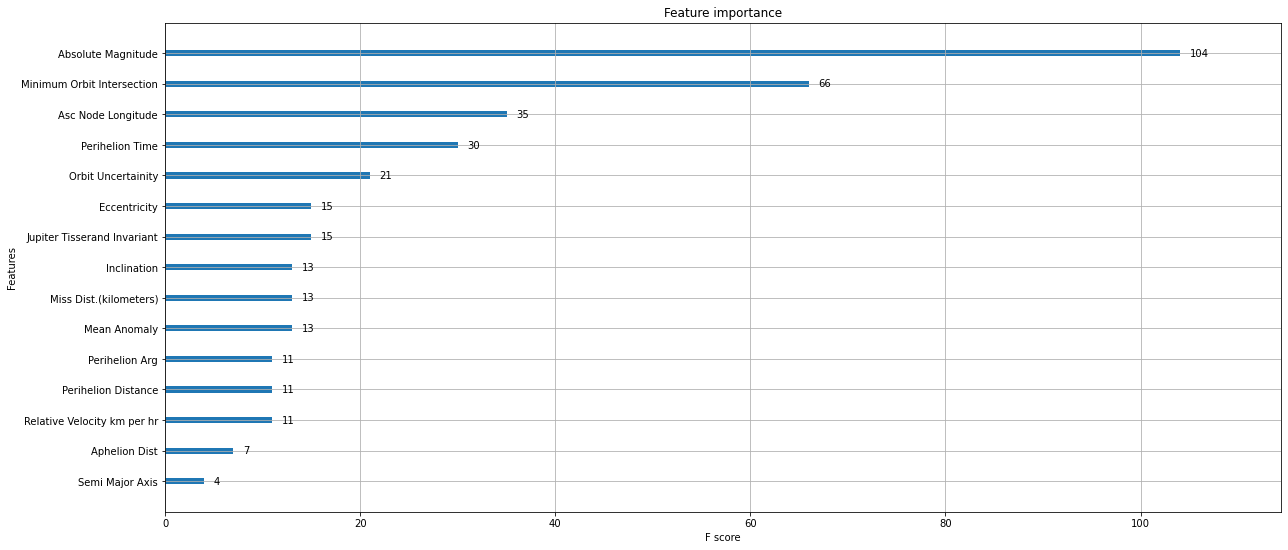

In [39]:
model = XGBClassifier()
model.fit(X, y)
# plot feature importance
plot_importance(model)
pyplot.show()

## 7. BOXPLOTs

In [40]:
boxdata = df.drop(['Neo Reference ID', 'Name', 'Close Approach Date',
                        'Epoch Date Close Approach', 'Orbit Determination Date'], axis=1)

In [41]:
boxdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Absolute Magnitude            4687 non-null   float64
 1   Est Dia in KM(min)            4687 non-null   float64
 2   Est Dia in KM(max)            4687 non-null   float64
 3   Relative Velocity km per sec  4687 non-null   float64
 4   Relative Velocity km per hr   4687 non-null   float64
 5   Miles per hour                4687 non-null   float64
 6   Miss Dist.(kilometers)        4687 non-null   float64
 7   Orbit ID                      4687 non-null   int64  
 8   Orbit Uncertainity            4687 non-null   int64  
 9   Minimum Orbit Intersection    4687 non-null   float64
 10  Jupiter Tisserand Invariant   4687 non-null   float64
 11  Epoch Osculation              4687 non-null   float64
 12  Eccentricity                  4687 non-null   float64
 13  Sem

<Figure size 1440x648 with 0 Axes>

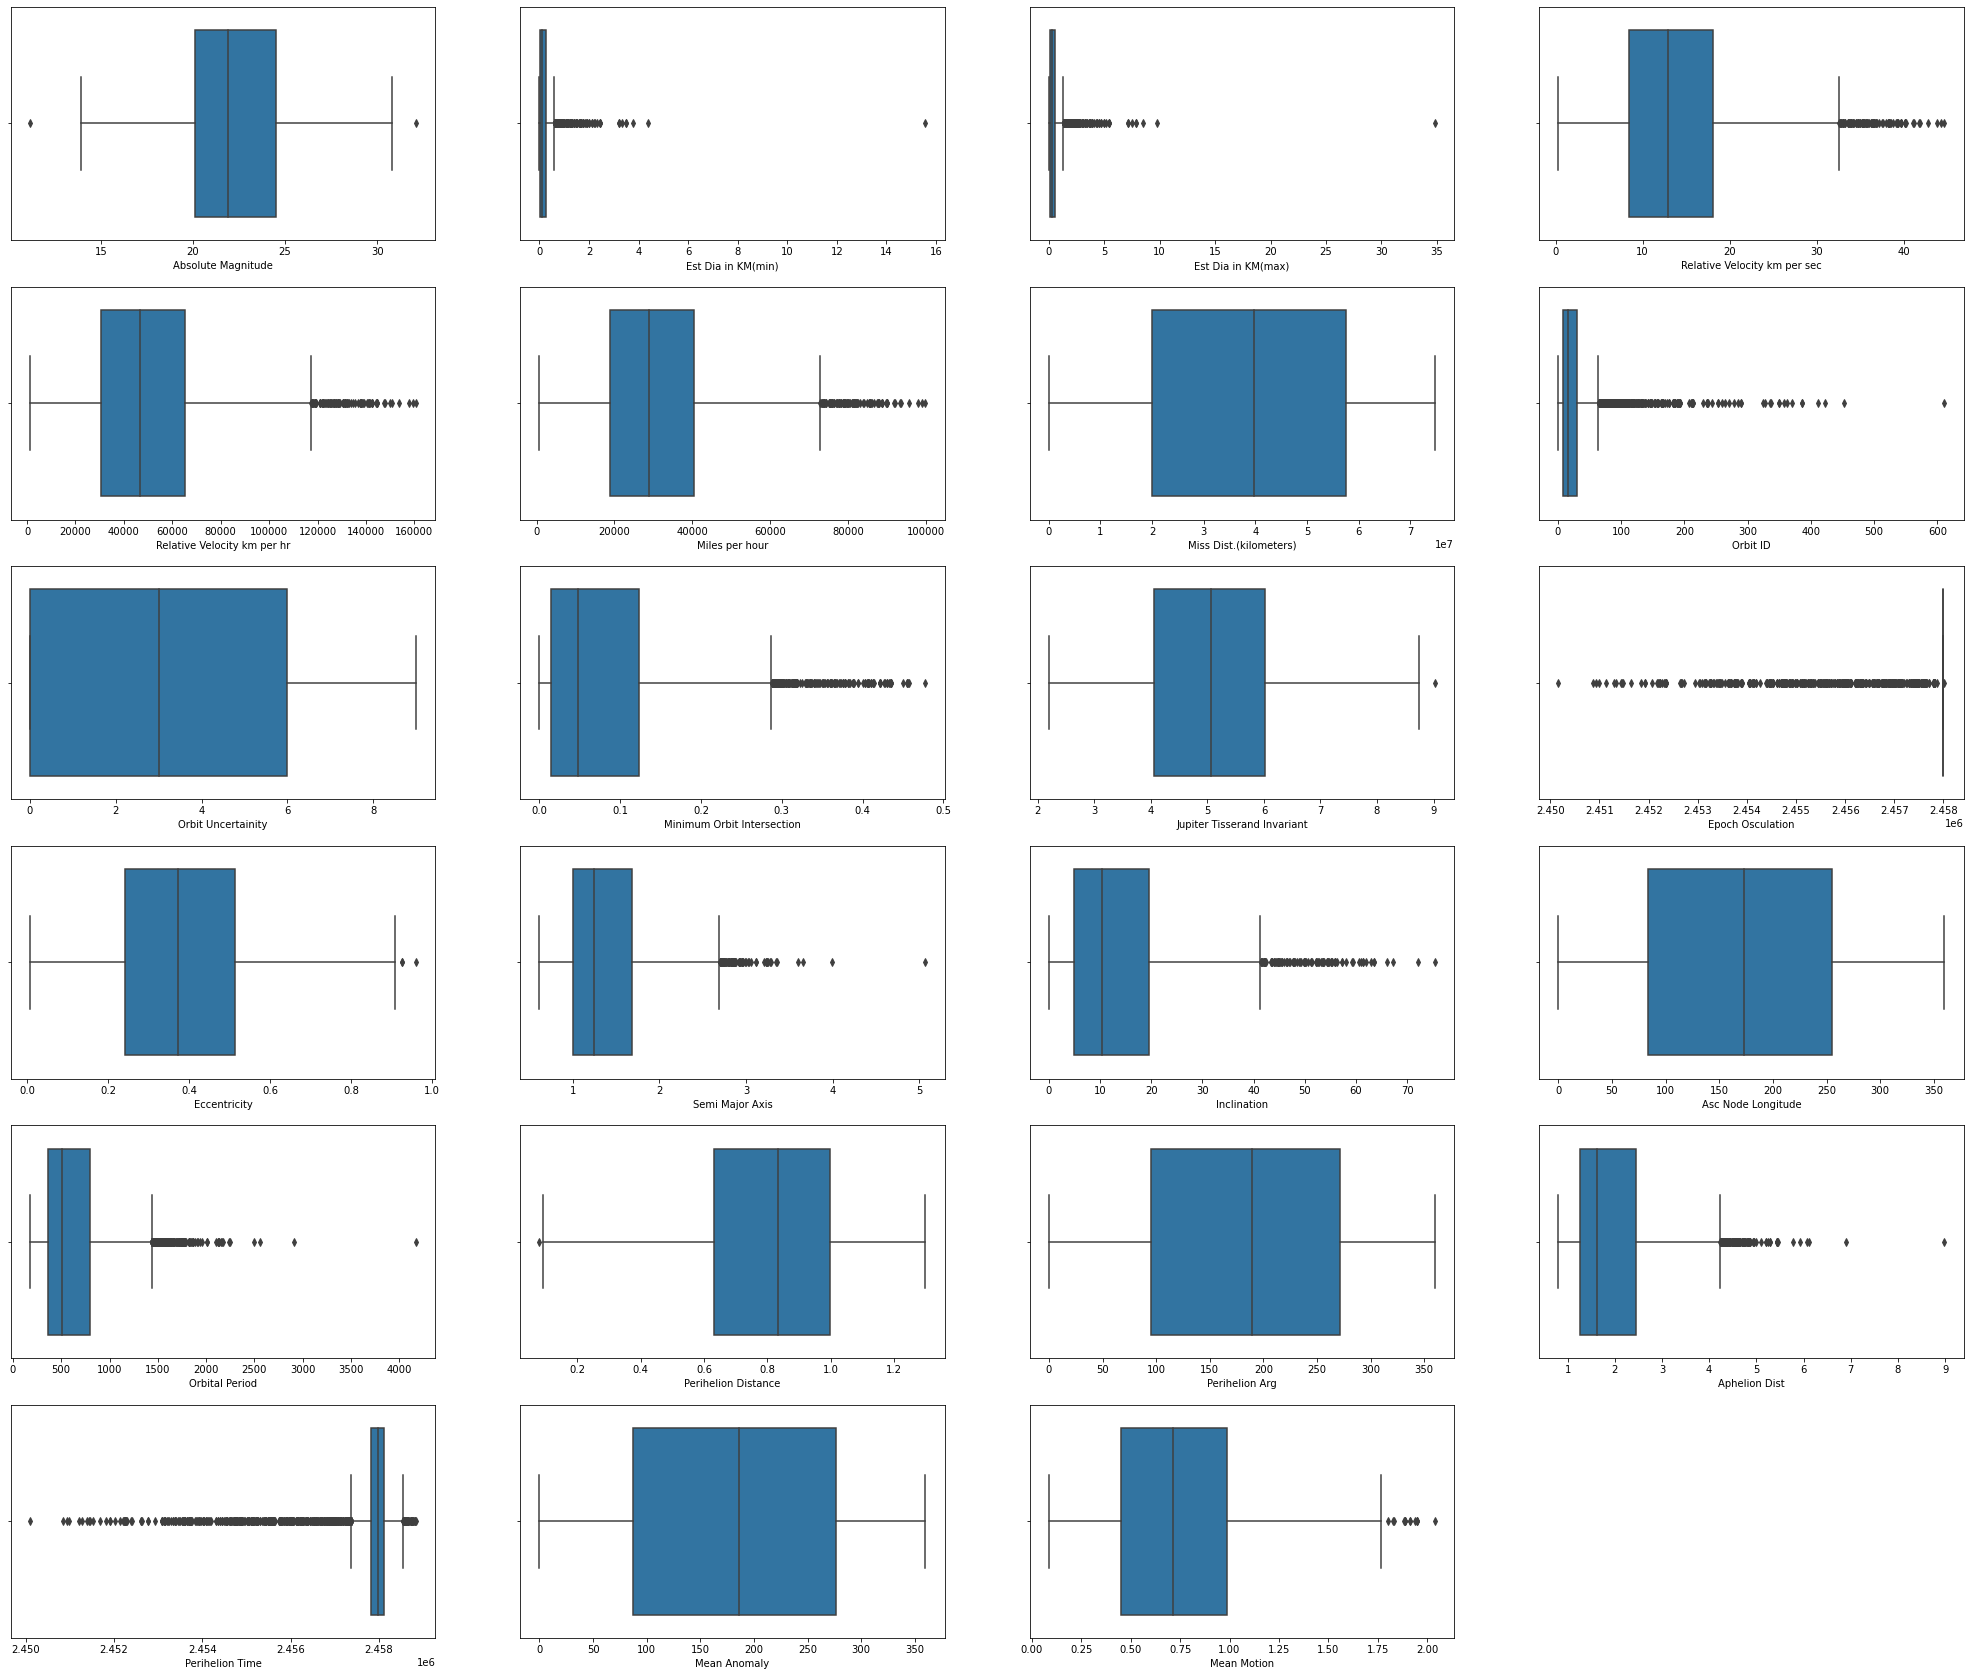

In [42]:
#plot the boxplots of all features
plt.tight_layout(pad=0.9)
plt.figure(figsize=(35,30)) 
plt.subplots_adjust(wspace = 0.2  )
nbr_columns = 4 
nbr_graphs = len(boxdata .columns) 
nbr_rows = int(np.ceil(nbr_graphs/nbr_columns)) 
columns = list(boxdata .columns.values) 
for i in range(0,len(columns)-1): 
    plt.subplot(nbr_rows,nbr_columns,i+1) 
    ax1=sns.boxplot(x= columns[i], data= boxdata, orient="h") 

plt.show() 

## 8. Outliners

In [43]:
from sklearn.neighbors import LocalOutlierFactor
from numpy import percentile

In [44]:
ds_boxdata = df.drop(['Neo Reference ID', 'Relative Velocity km per hr', 'Epoch Osculation', 'Name', 'Close Approach Date',  'Orbit ID', 'Epoch Date Close Approach', 'Orbit Determination Date', 'Hazardous'], axis=1)

In [45]:
ds_columns = ds_boxdata.columns
ds_columns

Index(['Absolute Magnitude', 'Est Dia in KM(min)', 'Est Dia in KM(max)',
       'Relative Velocity km per sec', 'Miles per hour',
       'Miss Dist.(kilometers)', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
       'Eccentricity', 'Semi Major Axis', 'Inclination', 'Asc Node Longitude',
       'Orbital Period', 'Perihelion Distance', 'Perihelion Arg',
       'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly', 'Mean Motion'],
      dtype='object')

In [46]:
ds_boxdata.shape

(4687, 20)

In [47]:
poped_ds_boxdata = ds_boxdata
for column in ds_columns:
    # calculate interquartile range
    q25, q75 = percentile(poped_ds_boxdata[column], 25), percentile(poped_ds_boxdata[column], 75)
    iqr = q75 - q25
    print("Column: {}".format(column))
    print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
    lower = q25 - 1.5*iqr
    upper = q75 + 1.5*iqr
    print("Upper: {}, Lower:{}".format(upper, lower))
    # leave only rows higher than lower and lower than upper
    poped_ds_boxdata = poped_ds_boxdata.loc[poped_ds_boxdata[column]>=lower]
    poped_ds_boxdata = poped_ds_boxdata.loc[poped_ds_boxdata[column]<=upper]
    # print(poped_ds_boxdata)
    print(poped_ds_boxdata.shape)

Column: Absolute Magnitude
Percentiles: 25th=20.100, 75th=24.500, IQR=4.400
Upper: 31.099999999999998, Lower:13.500000000000004
(4685, 20)
Column: Est Dia in KM(min)
Percentiles: 25th=0.033, 75th=0.254, IQR=0.220
Upper: 0.5843992174000001, Lower:-0.29709995060000005
(4376, 20)
Column: Est Dia in KM(max)
Percentiles: 25th=0.071, 75th=0.472, IQR=0.401
Upper: 1.0733398237375, Lower:-0.5299490427625
(4219, 20)
Column: Relative Velocity km per sec
Percentiles: 25th=8.110, 75th=17.282, IQR=9.172
Upper: 31.039334892300005, Lower:-5.647320145300002
(4138, 20)
Column: Miles per hour
Percentiles: 25th=18037.525, 75th=37833.845, IQR=19796.320
Upper: 67528.32591420432, Lower:-11656.955904953877
(4126, 20)
Column: Miss Dist.(kilometers)
Percentiles: 25th=17893560.000, 75th=55770205.000, IQR=37876645.000
Upper: 112585172.5, Lower:-38921407.5
(4126, 20)
Column: Orbit Uncertainity
Percentiles: 25th=1.000, 75th=7.000, IQR=6.000
Upper: 16.0, Lower:-8.0
(4126, 20)
Column: Minimum Orbit Intersection
Perce

<Figure size 1440x648 with 0 Axes>

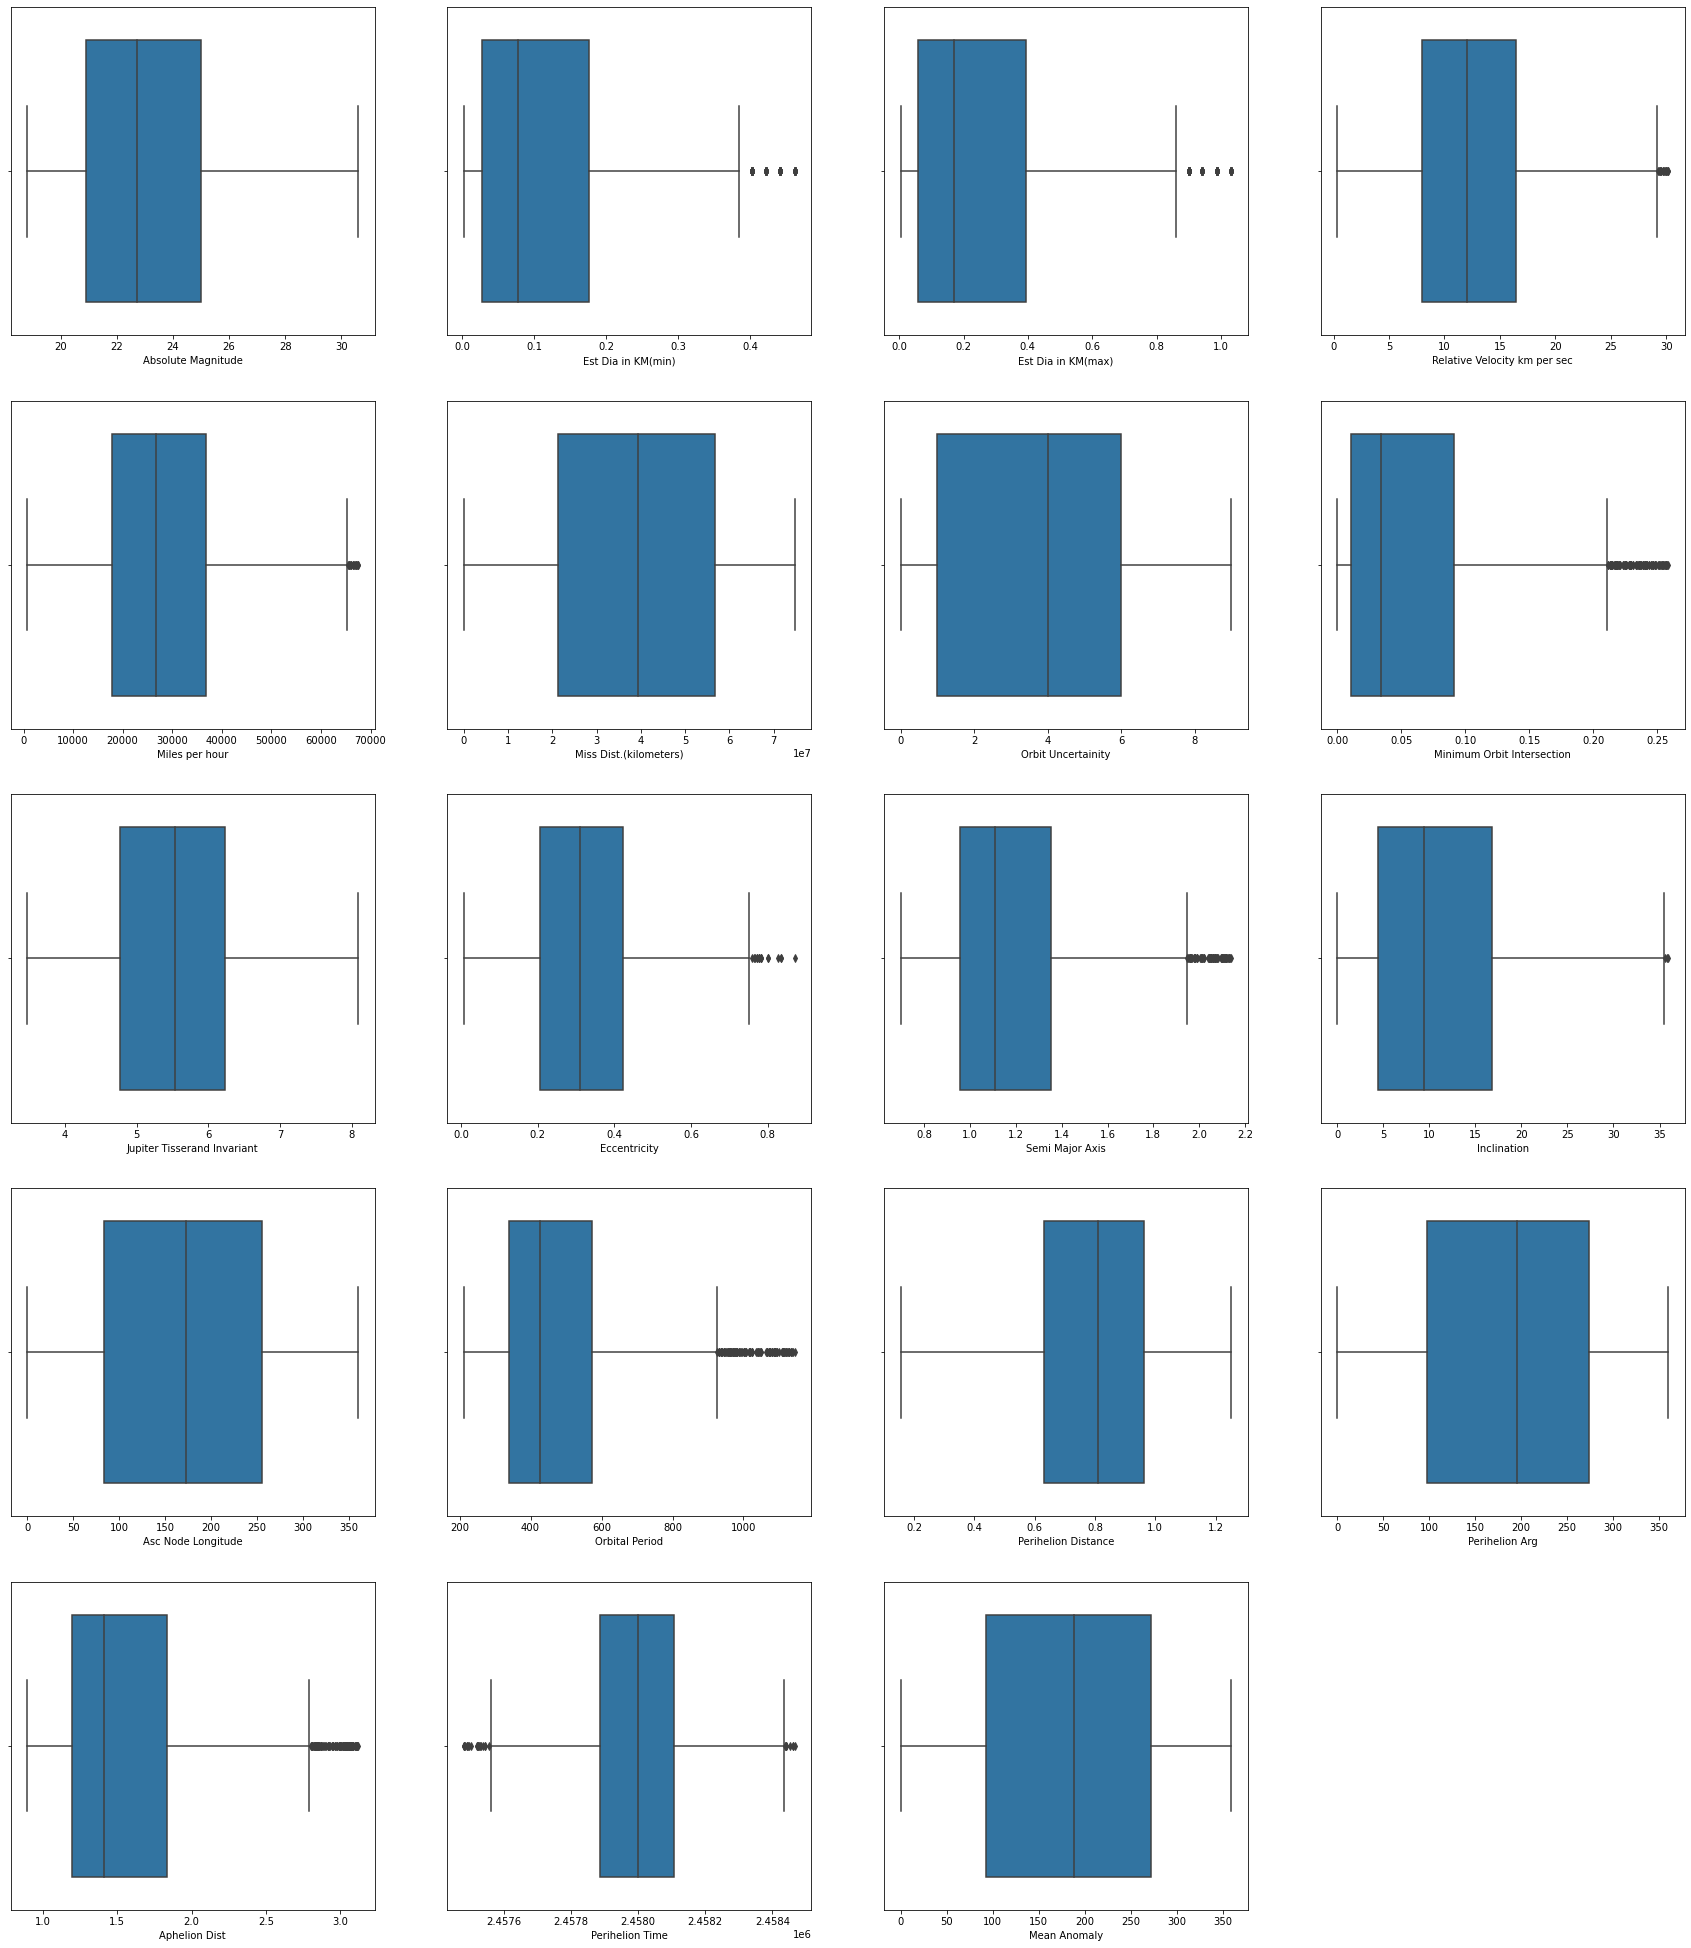

In [48]:
#plot the boxplots of all features
plt.tight_layout(pad=0.9)
plt.figure(figsize=(30,35)) 
plt.subplots_adjust(wspace = 0.2  )
nbr_columns = 4
nbr_graphs = len(poped_ds_boxdata.columns) 
nbr_rows = int(np.ceil(nbr_graphs/nbr_columns)) 
columns = list(poped_ds_boxdata.columns.values) 
for i in range(0,len(columns)-1): 
    # plt.subplot(nbr_rows,nbr_columns,i+1) 
    plt.subplot(nbr_rows,nbr_columns,i+1) 
    ax1=sns.boxplot(x=columns[i], data=poped_ds_boxdata, orient="h") 

plt.show() 

## 9. TRAINING, VALIDATION, AND TEST SET

In [49]:
#split data into train, cross validation, and test sets
asteroid_set, asteroid_test = train_test_split(df, test_size=0.2, random_state=7)
asteroid_train, asteroid_cv = train_test_split(asteroid_set, test_size=0.25, random_state=5)

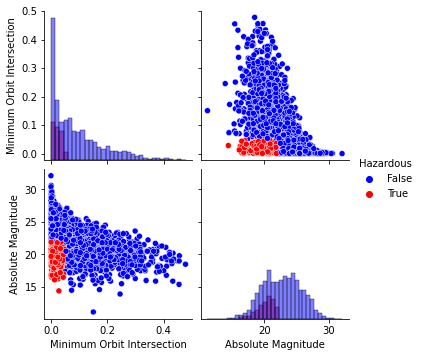

In [50]:
sns.pairplot(asteroid_train[['Minimum Orbit Intersection', 'Absolute Magnitude', 'Hazardous' ]], 
             diag_kind = 'hist', hue='Hazardous', palette = {1:'red', 0:'blue'})

## 10. Metrics - note

Accuracy is not the best metric to use when evaluating imbalanced datasets as it can be misleading.

Metrics that can provide better insight are:

- Confusion Matrix: a table showing correct predictions and types of incorrect predictions.
- Precision: the number of true positives divided by all positive predictions. Precision is also called Positive Predictive Value. It is a measure of a classifier’s exactness. Low precision indicates a high number of false positives.
- Recall: the number of true positives divided by the number of positive values in the test data. The recall is also called Sensitivity or the True Positive Rate. It is a measure of a classifier’s completeness. Low recall indicates a high number of false negatives.
- F1: Score: the weighted average of precision and recall.
- Area Under ROC Curve (AUROC): AUROC represents the likelihood of your model distinguishing observations from two classes.
In other words, if you randomly select one observation from each class, what’s the probability that your model will be able to “rank” them correctly?